In [2]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# reading tour dataframes
df = pd.read_csv(r'..\Tour data\all_Tours.csv')

In [4]:
# showing the first 5 rows
df.head()

,Unnamed: 0,Image,Tour Name,Tour Type,Tour Duration,Tour Price,Price Per,Cancellation,Tour By,City,Country,Link
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Clear all filters,Abu Dhabi,United Arab Emirates,NaN
1,1,https://dynamic-media-cdn.tripadvisor.com/medi...,Abu Dhabi Full-Day Sightseeing Tour from Dubai,Bus Tours,6+ hours,$40.00,per adult,Free cancellation,By RAH Tourism,Abu Dhabi,United Arab Emirates,https://www.tripadvisor.com/Attraction_Review-...
2,2,https://dynamic-media-cdn.tripadvisor.com/medi...,"Evening Desert Safari With BBQ Dinner, Camel R...",Shore Excursions,6 hours,$83.00,per adult,Free cancellation,By Emirates Tours and Safaris,Abu Dhabi,United Arab Emirates,https://www.tripadvisor.com/Attraction_Review-...
3,3,NaN,NaN,Cold feet?,NaN,NaN,NaN,NaN,NaN,Abu Dhabi,United Arab Emirates,NaN
4,4,https://dynamic-media-cdn.tripadvisor.com/medi...,Dubai to Abu Dhabi Grand Mosque & Qasr Al Wata...,Bus Tours,8–9 hours,$109.00,per adult,Free cancellation,By OceanAir Travels,Abu Dhabi,United Arab Emirates,https://www.tripadvisor.com/Attraction_Review-...


In [5]:
# information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17575 entries, 0 to 17574
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     17575 non-null  int64 
 1   Image          16335 non-null  object
 2   Tour Name      16373 non-null  object
 3   Tour Type      14512 non-null  object
 4   Tour Duration  16915 non-null  object
 5   Tour Price     16413 non-null  object
 6   Price Per      16373 non-null  object
 7   Cancellation   13959 non-null  object
 8   Tour By        16729 non-null  object
 9   City           17575 non-null  object
 10  Country        17575 non-null  object
 11  Link           16195 non-null  object
dtypes: int64(1), object(11)
memory usage: 1.6+ MB


**Issues**

- Remove Unnamed: 0 column
- Drop the null values
- Remove $ from Tour Price and convert it to float
- Replace Image column before the link
- Rename the Link column (Agency Link)
- Tour Duration convert different unit into one unit (in hour) deal with the different format of the time value.

In [6]:
# making copy for cleaning
df_clean = df.copy()

## Cleaning 

*1. General cleaning* <br>
*1.1 Drop the null values*

In [7]:
# drop the null value
df_clean = df_clean.dropna()

*1.2 Rename Tour Name, Tour Type, Tour Duration, Tour Price & Link columns*

In [8]:
# renaming the columns
df_clean.rename(columns={'Tour Name':'Tour', 'Tour Type':'Type', 'Tour Duration':'Duration', 'Tour Price':'Price', 'Link':'Link to agency'}, inplace=True)

In [9]:
# check the above
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11368 entries, 1 to 17573
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      11368 non-null  int64 
 1   Image           11368 non-null  object
 2   Tour            11368 non-null  object
 3   Type            11368 non-null  object
 4   Duration        11368 non-null  object
 5   Price           11368 non-null  object
 6   Price Per       11368 non-null  object
 7   Cancellation    11368 non-null  object
 8   Tour By         11368 non-null  object
 9   City            11368 non-null  object
 10  Country         11368 non-null  object
 11  Link to agency  11368 non-null  object
dtypes: int64(1), object(11)
memory usage: 1.1+ MB


*2. Specific column cleaning*
<br>
*2.1 Remove unnecessary column*

In [10]:
# drop the Unnamed: 0 column
df_clean.drop('Unnamed: 0', axis=1, inplace=True)

*2.2 Image column*

In [11]:
# Replace the image column
df_clean = df_clean[['Tour', 'Type', 'Duration', 'Price', 'Price Per', 'Cancellation','Tour By', 'City', 'Country', 'Image', 'Link to agency']]

*2.3 Tour Name column*

In [12]:
# check the number of unique values in Tour name
df_clean['Tour'].nunique()

10891

*Since the number of unique value in the Tour column is not the same number of entries in the dataset. This mean there are so many duplicates in the name. Whereas, the Tour column should be all unique.*

In [13]:
# check the value counts in Tour name
df_clean['Tour'].value_counts()

Abu Dhabi City Tour From Dubai                                                    12
4 in 1 package sale (Dubai City tour-Safari-dinner cruise-Abu Dhabi City tour)     6
Private Abu Dhabi City Tour                                                        5
Essaouira Day Trip from Marrakech                                                  4
Abu Dhabi City Tour                                                                4
                                                                                  ..
Visit Kensington Palace & 3 Hour Westminster Walking Tour                          1
Winston Churchill's London and The Churchill War Rooms - A Private Tour.           1
High-Speed Boat Trip through London                                                1
Shakespeare's Stratford-upon-Avon and Cotswolds Tour from London                   1
Desert Safari with BBQ Dinner in Dubai Desert                                      1
Name: Tour, Length: 10891, dtype: int64

In [14]:
# drop the duplicates in Tour column
df_clean.drop_duplicates(subset=['Tour'],inplace=True)

In [15]:
# to check the above
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10891 entries, 1 to 17573
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Tour            10891 non-null  object
 1   Type            10891 non-null  object
 2   Duration        10891 non-null  object
 3   Price           10891 non-null  object
 4   Price Per       10891 non-null  object
 5   Cancellation    10891 non-null  object
 6   Tour By         10891 non-null  object
 7   City            10891 non-null  object
 8   Country         10891 non-null  object
 9   Image           10891 non-null  object
 10  Link to agency  10891 non-null  object
dtypes: object(11)
memory usage: 1021.0+ KB


*2.4 Tour Type column*

In [16]:
# check the number of unique values in Tour Type
df_clean['Type'].nunique()

129

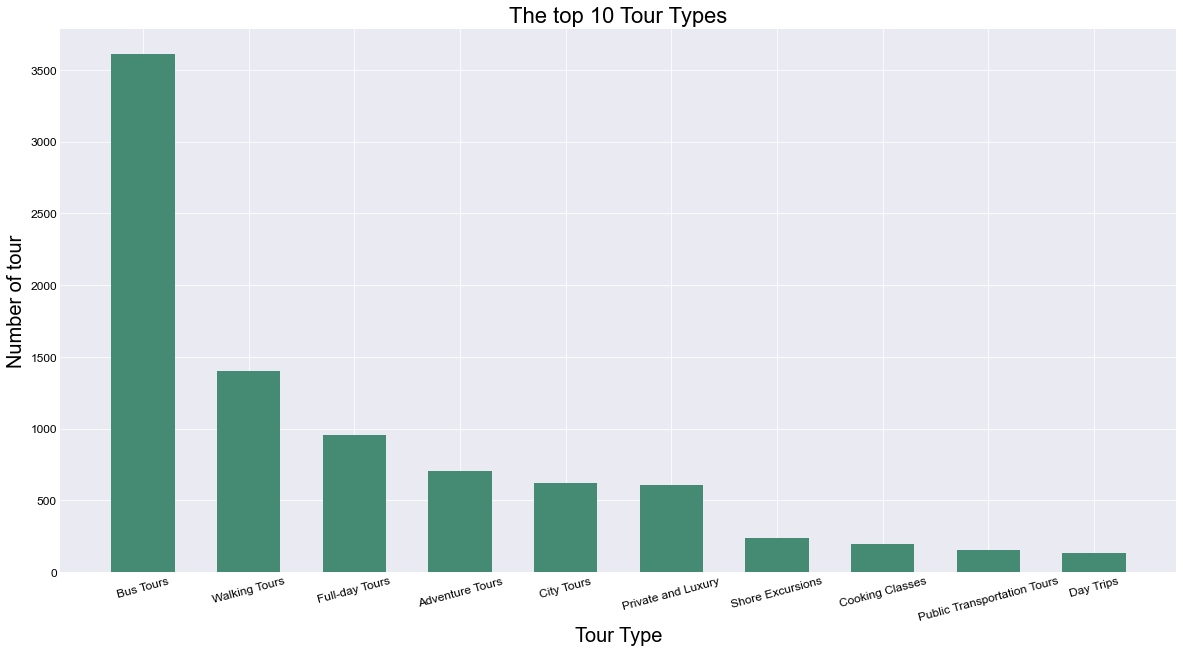

In [17]:
# Bar chart for the top 10 Type
x = df_clean['Type'].value_counts().head(10).index
y = df_clean['Type'].value_counts().head(10)

plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(20,10))
plt.xticks( color ='#000000',fontsize=12, rotation = 15)
plt.yticks(color ='#000000',fontsize=12)
plt.bar(x, y, color= ('#458B74'), width=0.6)
plt.xlabel('Tour Type',fontsize=20, color ='#000000')
plt.ylabel('Number of tour',fontsize=20, color ='#000000')
plt.title('The top 10 Tour Types',fontsize=22, color ='#000000')
plt.show();

*Bus Tours is the top type of tour in thid dataset, with more than 3500 Tours. Followwed by the walking Tours*

*2.5 Tour Duration column*

In [18]:
# check the number of unique values in Tour Duration
df_clean['Duration'].nunique()

244

In [19]:
# check the value count in Tour Duration
df_clean['Duration'].value_counts()

6+ hours           2310
3 hours            1258
4 hours             943
2 hours             821
2–3 hours           579
                   ... 
45–100 minutes        1
75–90 minutes         1
1–16 hours            1
700–750 minutes       1
30–55 minutes         1
Name: Duration, Length: 244, dtype: int64

*The values in this column are in different units: days, hours and minutes.*
*So, let separate the units first and then convert them all inot one unit (in hour).*
*The values with range I will calculate the average of them. As what I saw back in the tripadvisor.com.*

*2.5.1 Separate the time value and the duration unit in two columns*

In [20]:
# separate each the duration (in number) and the unit making new columns
df_clean[['Time','Unit']] = df_clean.Duration.str.split(" ",expand=True)
df_clean

,Tour,Type,Duration,Price,Price Per,Cancellation,Tour By,City,Country,Image,Link to agency,Time,Unit
1,Abu Dhabi Full-Day Sightseeing Tour from Dubai,Bus Tours,6+ hours,$40.00,per adult,Free cancellation,By RAH Tourism,Abu Dhabi,United Arab Emirates,https://dynamic-media-cdn.tripadvisor.com/medi...,https://www.tripadvisor.com/Attraction_Review-...,6+,hours
2,"Evening Desert Safari With BBQ Dinner, Camel R...",Shore Excursions,6 hours,$83.00,per adult,Free cancellation,By Emirates Tours and Safaris,Abu Dhabi,United Arab Emirates,https://dynamic-media-cdn.tripadvisor.com/medi...,https://www.tripadvisor.com/Attraction_Review-...,6,hours
4,Dubai to Abu Dhabi Grand Mosque & Qasr Al Wata...,Bus Tours,8–9 hours,$109.00,per adult,Free cancellation,By OceanAir Travels,Abu Dhabi,United Arab Emirates,https://dynamic-media-cdn.tripadvisor.com/medi...,https://www.tripadvisor.com/Attraction_Review-...,8–9,hours
5,Abu Dhabi Private City Tour,Bus Tours,5 hours,$200.00,per group,Free cancellation,By RAH Tourism,Abu Dhabi,United Arab Emirates,https://dynamic-media-cdn.tripadvisor.com/medi...,https://www.tripadvisor.com/Attraction_Review-...,5,hours
6,"Abu Dhabi City Tour - Grand Mosque, Emirates P...",Bus Tours,8–9 hours,$75.00,per adult,Free cancellation,By RAH Tourism,Abu Dhabi,United Arab Emirates,https://dynamic-media-cdn.tripadvisor.com/medi...,https://www.tripadvisor.com/Attraction_Review-...,8–9,hours
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17568,Extreme Adventure Tour,Adventure Tours,5 hours,$59.71,per adult,Free cancellation,By Planet Tours & Safaris,Dubai,United Arab Emirates,https://dynamic-media-cdn.tripadvisor.com/medi...,https://www.tripadvisor.com/Attraction_Review-...,5,hours
17570,"Speed Boat Tour : 60 Mins, 75 Mins 90 Mins BLA...",Speed Boats,1–2 hours,$45.00,per adult,Free cancellation,By Top 10 Dubai Tours,Dubai,United Arab Emirates,https://dynamic-media-cdn.tripadvisor.com/medi...,https://www.tripadvisor.com/Attraction_Review-...,1–2,hours
17571,"Premium 1 Hr Quad Biking with Refreshments , C...",Adventure Tours,4 hours,$65.13,per adult,Free cancellation,By Trawey Tours,Dubai,United Arab Emirates,https://dynamic-media-cdn.tripadvisor.com/medi...,https://www.tripadvisor.com/Attraction_Review-...,4,hours
17572,"Evening Safari with Quad Bike, Camel Riding, B...",Adventure Tours,6 hours,$140.00,per adult,Free cancellation,By Arabian Tour Packages,Dubai,United Arab Emirates,https://dynamic-media-cdn.tripadvisor.com/medi...,https://www.tripadvisor.com/Attraction_Review-...,6,hours


*2.5.2 Removing other characters in Time column*

In [21]:
# removing the + sign from Time column, by using str.replace
df_clean['Time'] = df_clean['Time'].str.replace('+', '')
df_clean['Time'] = df_clean['Time'].str.replace(',', '')

C:\Users\Fatemah\AppData\Local\Temp/ipykernel_17664/2870402399.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_clean['Time'] = df_clean['Time'].str.replace('+', '')


*After removing + sign and the comma , now I can separate the other format in Time column* <br> 
<br>
*2.5.3 Separate the numbers in Time column to minimum duration & maximum duration*

In [22]:
# separate each the Time value in XX-XX this format to two column minD (minimum Duration) & maxD (maximum Duration)
df_clean[['minD','maxD']] = df_clean.Time.str.split("–",expand=True)
df_clean

,Tour,Type,Duration,Price,Price Per,Cancellation,Tour By,City,Country,Image,Link to agency,Time,Unit,minD,maxD
1,Abu Dhabi Full-Day Sightseeing Tour from Dubai,Bus Tours,6+ hours,$40.00,per adult,Free cancellation,By RAH Tourism,Abu Dhabi,United Arab Emirates,https://dynamic-media-cdn.tripadvisor.com/medi...,https://www.tripadvisor.com/Attraction_Review-...,6,hours,6,None
2,"Evening Desert Safari With BBQ Dinner, Camel R...",Shore Excursions,6 hours,$83.00,per adult,Free cancellation,By Emirates Tours and Safaris,Abu Dhabi,United Arab Emirates,https://dynamic-media-cdn.tripadvisor.com/medi...,https://www.tripadvisor.com/Attraction_Review-...,6,hours,6,None
4,Dubai to Abu Dhabi Grand Mosque & Qasr Al Wata...,Bus Tours,8–9 hours,$109.00,per adult,Free cancellation,By OceanAir Travels,Abu Dhabi,United Arab Emirates,https://dynamic-media-cdn.tripadvisor.com/medi...,https://www.tripadvisor.com/Attraction_Review-...,8–9,hours,8,9
5,Abu Dhabi Private City Tour,Bus Tours,5 hours,$200.00,per group,Free cancellation,By RAH Tourism,Abu Dhabi,United Arab Emirates,https://dynamic-media-cdn.tripadvisor.com/medi...,https://www.tripadvisor.com/Attraction_Review-...,5,hours,5,None
6,"Abu Dhabi City Tour - Grand Mosque, Emirates P...",Bus Tours,8–9 hours,$75.00,per adult,Free cancellation,By RAH Tourism,Abu Dhabi,United Arab Emirates,https://dynamic-media-cdn.tripadvisor.com/medi...,https://www.tripadvisor.com/Attraction_Review-...,8–9,hours,8,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17568,Extreme Adventure Tour,Adventure Tours,5 hours,$59.71,per adult,Free cancellation,By Planet Tours & Safaris,Dubai,United Arab Emirates,https://dynamic-media-cdn.tripadvisor.com/medi...,https://www.tripadvisor.com/Attraction_Review-...,5,hours,5,None
17570,"Speed Boat Tour : 60 Mins, 75 Mins 90 Mins BLA...",Speed Boats,1–2 hours,$45.00,per adult,Free cancellation,By Top 10 Dubai Tours,Dubai,United Arab Emirates,https://dynamic-media-cdn.tripadvisor.com/medi...,https://www.tripadvisor.com/Attraction_Review-...,1–2,hours,1,2
17571,"Premium 1 Hr Quad Biking with Refreshments , C...",Adventure Tours,4 hours,$65.13,per adult,Free cancellation,By Trawey Tours,Dubai,United Arab Emirates,https://dynamic-media-cdn.tripadvisor.com/medi...,https://www.tripadvisor.com/Attraction_Review-...,4,hours,4,None
17572,"Evening Safari with Quad Bike, Camel Riding, B...",Adventure Tours,6 hours,$140.00,per adult,Free cancellation,By Arabian Tour Packages,Dubai,United Arab Emirates,https://dynamic-media-cdn.tripadvisor.com/medi...,https://www.tripadvisor.com/Attraction_Review-...,6,hours,6,None


*2.5.4 Convert data type to float*

In [23]:
# convert the data type of minD & maxD to float
df_clean['minD'] = pd.to_numeric(df_clean['minD'], downcast="float")
df_clean['maxD'] = pd.to_numeric(df_clean['maxD'], downcast="float")

*2.5.5 Calculate time average*

In [24]:
# fill the null value in maxD with the same vale in minD for later on average
df_clean['maxD'].fillna(df_clean['minD'], inplace=True)

In [25]:
# calculating the average Time
df_clean['AverageTime'] = (df_clean['minD'] + df_clean['maxD']) / 2

In [26]:
# drop the Duration, Time, minD & maxD columns
df_clean.drop(['Duration', 'Time', 'minD','maxD'], axis=1, inplace=True)

*2.5.6 Convert time average to hours*

In [27]:
# Convert days to hours
df_clean.loc[df_clean['Unit']=='days', ['AverageTime']] *= 24
df_clean.loc[df_clean['Unit']=='days', ['AverageTime']] *= 24

# Convert minutes to hours
df_clean.loc[df_clean['Unit']=='minutes', ['AverageTime']] /= 60
df_clean.loc[df_clean['Unit']=='minute', ['AverageTime']] /= 60

# make sure hour will be the same
df_clean.loc[df_clean['Unit']=='hours', ['AverageTime']] *= 1
df_clean.loc[df_clean['Unit']=='hour', ['AverageTime']] *= 1

*2.5.7 Rename, drop and replace columns after convertaing to average time in hour*

In [28]:
# Rename AverageTime column
df_clean.rename(columns={'AverageTime':'Duration'}, inplace=True)

In [29]:
# drop the Unit column
df_clean.drop('Unit', axis=1, inplace=True)

In [30]:
# Replace the duration column
df_clean = df_clean[['Tour', 'Type', 'Duration', 'Price', 'Price Per', 'Cancellation','Tour By', 'City', 'Country', 'Image', 'Link to agency']]

In [31]:
# limit a float to two decimal places
df_clean.Duration = round(df_clean.Duration, 2)

In [32]:
# check the values
df_clean.Duration.value_counts()

6.00       2720
3.00       1314
4.00        993
2.00        862
2.50        603
           ... 
3168.00       1
2.10          1
1.17          1
0.57          1
0.71          1
Name: Duration, Length: 135, dtype: int64

In [33]:
# check all the changes in the above section 2.5 Tour Duration column
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10891 entries, 1 to 17573
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Tour            10891 non-null  object 
 1   Type            10891 non-null  object 
 2   Duration        10891 non-null  float32
 3   Price           10891 non-null  object 
 4   Price Per       10891 non-null  object 
 5   Cancellation    10891 non-null  object 
 6   Tour By         10891 non-null  object 
 7   City            10891 non-null  object 
 8   Country         10891 non-null  object 
 9   Image           10891 non-null  object 
 10  Link to agency  10891 non-null  object 
dtypes: float32(1), object(10)
memory usage: 978.5+ KB


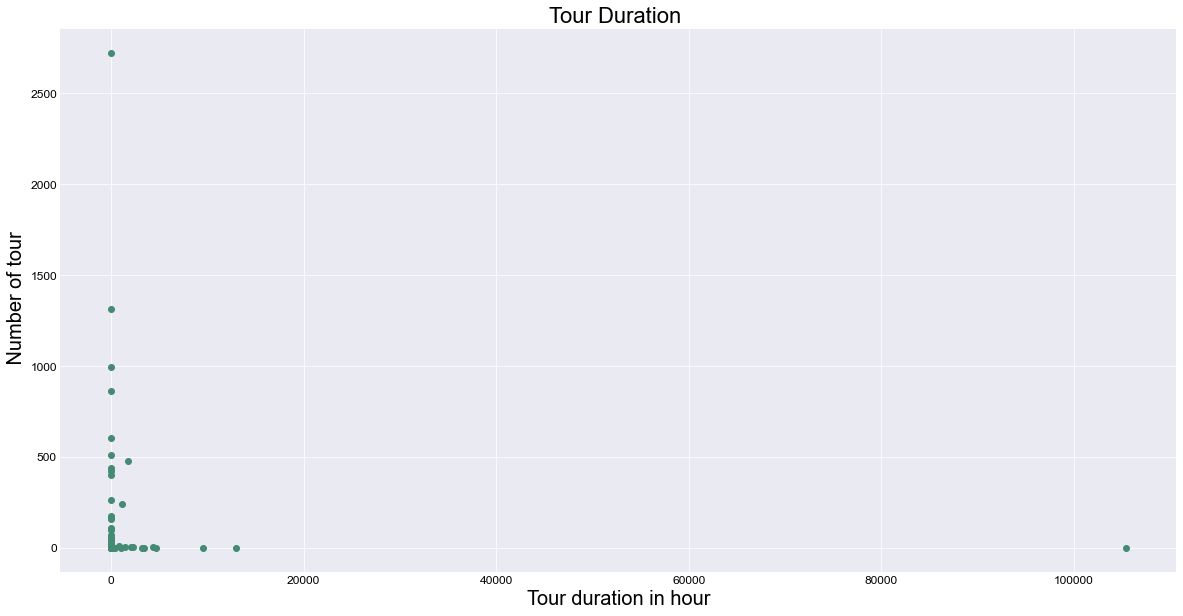

In [34]:
# scatter chart for the tour duration
x = df_clean['Duration'].value_counts().index
y = df_clean['Duration'].value_counts()
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(20,10))
plt.scatter(x, y, color='#458B74')
plt.xticks( color ='#000000',fontsize=12)
plt.yticks(color ='#000000',fontsize=12)
plt.xlabel('Tour duration in hour',fontsize=20, color ='#000000')
plt.ylabel(' Number of tour',fontsize=20, color ='#000000')
plt.title('Tour Duration ',fontsize=22, color ='#000000')
plt.show();

*From the above plot, we can see the extrem value in the tour duration. With more than 100,000 hours*

In [35]:
# finding the maximum value and drop it
df_clean['Duration'].max()

105408.0

In [36]:
# drop the extrem value
df_clean = df_clean[df_clean.Duration != 105408.0]

In [37]:
# Statistic summary of duration column
df_clean['Duration'].describe()

count    10890.000000
mean       111.342148
std        427.070007
min          0.020000
25%          2.500000
50%          4.000000
75%          6.000000
max      12960.000000
Name: Duration, dtype: float64

*Most of the Tours take 4-6 hours in average. Some of the tours are really long because it extends for days*

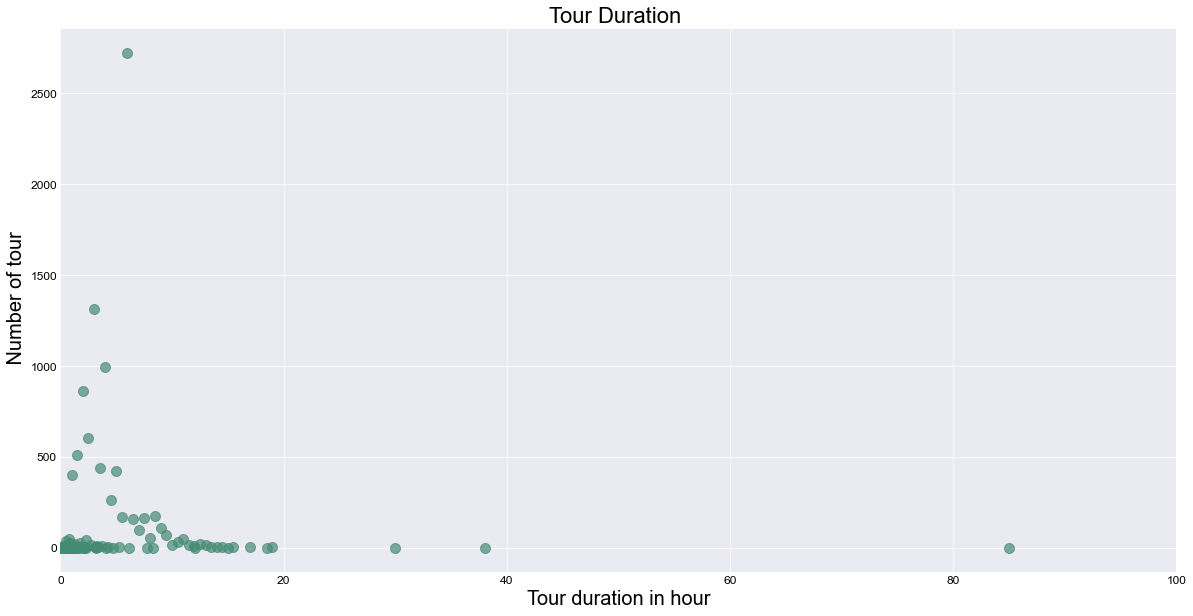

In [38]:
# scatter chart for the tour duration after droping the extrem
x = df_clean['Duration'].value_counts().index
y = df_clean['Duration'].value_counts()
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(20,10))
plt.scatter(x, y, color='#458B74', s=100, alpha=0.7)
plt.xlim(0, 100)
plt.xticks( color ='#000000',fontsize=12)
plt.yticks(color ='#000000',fontsize=12)
plt.xlabel('Tour duration in hour',fontsize=20, color ='#000000')
plt.ylabel(' Number of tour',fontsize=20, color ='#000000')
plt.title('Tour Duration ',fontsize=22, color ='#000000')
plt.show();

*2.6 Tour Price column*

In [39]:
# summary statistics for the price based on the Country column
df_clean[['Country','Price']].groupby('Country').describe()

Price                     
                     count unique      top freq
Country                                        
Argentina              376    214  $150.00   13
Australia               72     61   $58.59    2
Austria                138    100  $135.76    5
Brazil                 267    197   $50.00    6
Canada                  95     73  $103.86    5
China                  750    433  $180.00   13
Egypt                  368    191   $20.00   20
Frence                 447    292  $112.00    9
Germany                128    103   $22.63    5
Greece                 321    212  $169.70    8
India                  182    151   $62.00    3
Italy                 1430    602  $100.69   41
Japan                  238    174  $159.89    6
Malaysia               182    151   $35.00    4
Mexico                 226    169   $38.00    6
Morocco                558    308   $33.94   17
Netherlands            233    157   $39.60   16
Oman                   259    176  $200.00   39
Qatar                   88     61  $127.00    5
Saudi Arabia            52     46  $152.00    2
Singapore              100     86   $75.53    2
South Africa           335    240  $109.41   10
South Korea            192    146   $80.00    9
Spain                  504    287   $28.28   15
Turkey                 767    405   $39.60   15
UK                     625    347   $20.76   18
USA                   1147    524   $35.00   25
United Arab Emirates   810    451   $75.00   25

In [40]:
# removing the $ sign and , from ‘Price’ column using str.replace
df_clean['Price'] = df_clean['Price'].str.replace('$', '')
df_clean['Price'] = df_clean['Price'].str.replace(',', '')

C:\Users\Fatemah\AppData\Local\Temp/ipykernel_17664/440693180.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_clean['Price'] = df_clean['Price'].str.replace('$', '')


In [41]:
# convert the data type of Price to float
df_clean['Price'] = pd.to_numeric(df_clean['Price'], downcast="float")

In [42]:
# limit a float to two decimal places
df_clean.Price = round(df_clean.Price, 2)

In [43]:
# to check the above 
df_clean['Price'].dtype

dtype('float32')

In [44]:
# Statistic summary of price column
df_clean['Price'].describe()

count    10890.000000
mean       186.328812
std        355.802765
min          3.350000
25%         52.040001
50%         96.169998
75%        189.000000
max      12570.700195
Name: Price, dtype: float64

*The minimum tour price in this data is $3.35, whereas the maximum tour price is $12,570*

C:\Users\Fatemah\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


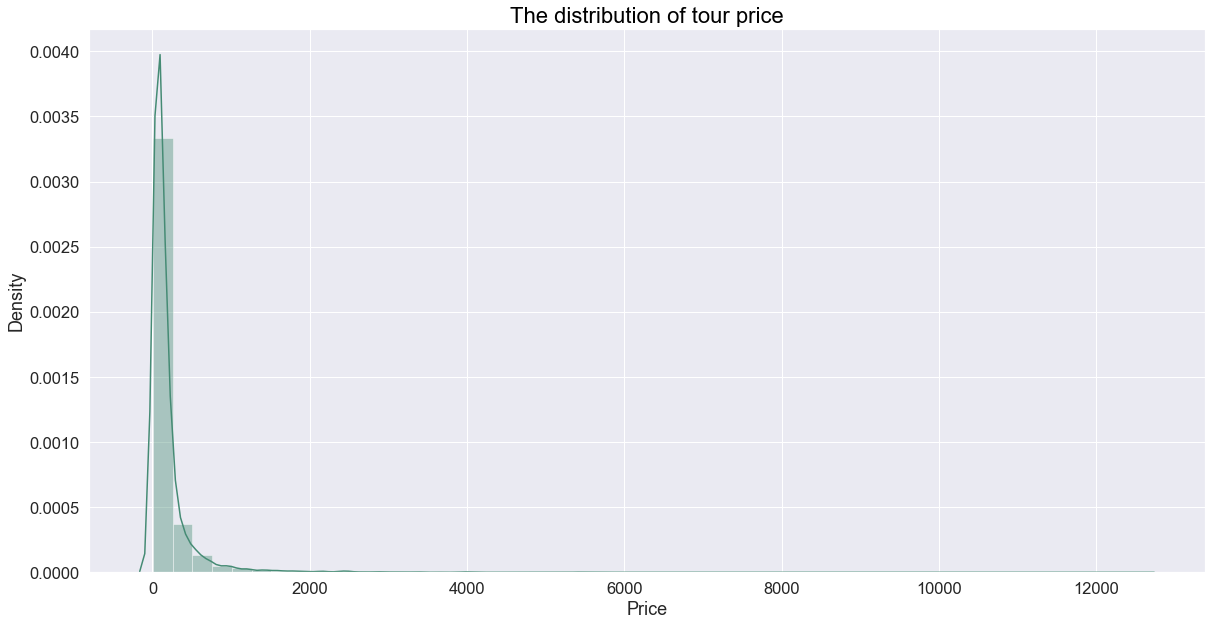

In [45]:
# distribution plot for the price
plt.style.use('seaborn-darkgrid')
sns.set(font_scale=1.5)
plt.figure(figsize=(20,10))
sns.distplot(df_clean['Price'],color= ('#458B74'))
plt.title('The distribution of tour price',fontsize=22, color ='#000000');

*2.7 Price Per adult/group*

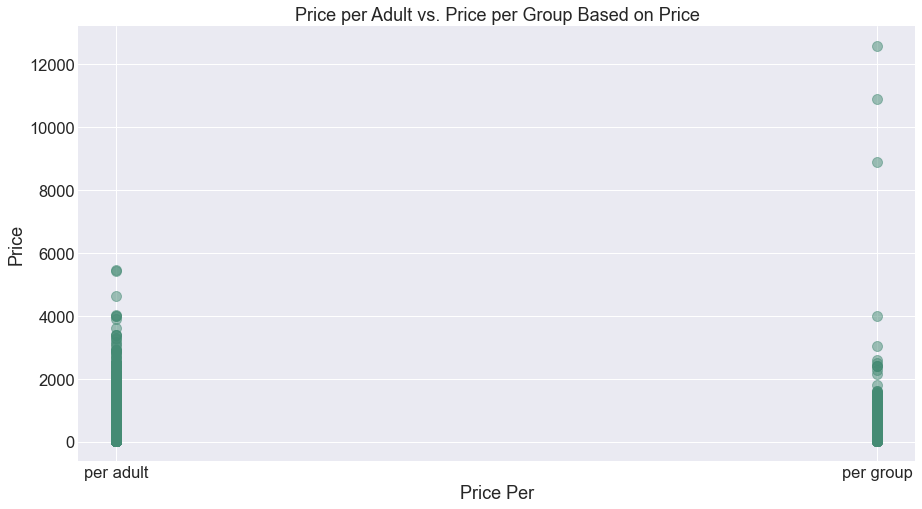

In [47]:
# Scatter plot of the price per adult vs. price per group
plt.style.use('seaborn-darkgrid')
df_clean.plot(x='Price Per', y='Price', kind='scatter',figsize=(15,8), color='#458B74', s=100, alpha=0.5 , title='Price per Adult vs. Price per Group Based on Price');

*Most of tours price per group is less than tour price per adult.*

*2.8 Cancellation column*

In [48]:
# check the column values 
df_clean['Cancellation'].value_counts()

Free cancellation      10889
LIKELY TO SELL OUT*        1
Name: Cancellation, dtype: int64

In [49]:
# remove the LIKELY TO SELL OUT* value
df_clean = df_clean[df_clean.Cancellation != 'LIKELY TO SELL OUT*']

*All of the Tours in this dataset are flexible booking and provide free cancellation.*

*2.9 Tour By column*

In [50]:
# number of unique value
df_clean['Tour By'].nunique()

3558

*There are 3558 different agencies providing tours in this dataset*

*2.10 City & Country columns*

In [51]:
# show number of unique values in each city & country column
print('Number of unoque value in City column:',df_clean['City'].nunique())
print('Number of unoque value in Country column:',df_clean['Country'].nunique())

Number of unoque value in City column: 39
Number of unoque value in Country column: 28


In [52]:
# reset the index
df_clean.reset_index(drop=True)

,Tour,Type,Duration,Price,Price Per,Cancellation,Tour By,City,Country,Image,Link to agency
0,Abu Dhabi Full-Day Sightseeing Tour from Dubai,Bus Tours,6.0,40.000000,per adult,Free cancellation,By RAH Tourism,Abu Dhabi,United Arab Emirates,https://dynamic-media-cdn.tripadvisor.com/medi...,https://www.tripadvisor.com/Attraction_Review-...
1,"Evening Desert Safari With BBQ Dinner, Camel R...",Shore Excursions,6.0,83.000000,per adult,Free cancellation,By Emirates Tours and Safaris,Abu Dhabi,United Arab Emirates,https://dynamic-media-cdn.tripadvisor.com/medi...,https://www.tripadvisor.com/Attraction_Review-...
2,Dubai to Abu Dhabi Grand Mosque & Qasr Al Wata...,Bus Tours,8.5,109.000000,per adult,Free cancellation,By OceanAir Travels,Abu Dhabi,United Arab Emirates,https://dynamic-media-cdn.tripadvisor.com/medi...,https://www.tripadvisor.com/Attraction_Review-...
3,Abu Dhabi Private City Tour,Bus Tours,5.0,200.000000,per group,Free cancellation,By RAH Tourism,Abu Dhabi,United Arab Emirates,https://dynamic-media-cdn.tripadvisor.com/medi...,https://www.tripadvisor.com/Attraction_Review-...
4,"Abu Dhabi City Tour - Grand Mosque, Emirates P...",Bus Tours,8.5,75.000000,per adult,Free cancellation,By RAH Tourism,Abu Dhabi,United Arab Emirates,https://dynamic-media-cdn.tripadvisor.com/medi...,https://www.tripadvisor.com/Attraction_Review-...
...,...,...,...,...,...,...,...,...,...,...,...
10884,Extreme Adventure Tour,Adventure Tours,5.0,59.709999,per adult,Free cancellation,By Planet Tours & Safaris,Dubai,United Arab Emirates,https://dynamic-media-cdn.tripadvisor.com/medi...,https://www.tripadvisor.com/Attraction_Review-...
10885,"Speed Boat Tour : 60 Mins, 75 Mins 90 Mins BLA...",Speed Boats,1.5,45.000000,per adult,Free cancellation,By Top 10 Dubai Tours,Dubai,United Arab Emirates,https://dynamic-media-cdn.tripadvisor.com/medi...,https://www.tripadvisor.com/Attraction_Review-...
10886,"Premium 1 Hr Quad Biking with Refreshments , C...",Adventure Tours,4.0,65.129997,per adult,Free cancellation,By Trawey Tours,Dubai,United Arab Emirates,https://dynamic-media-cdn.tripadvisor.com/medi...,https://www.tripadvisor.com/Attraction_Review-...
10887,"Evening Safari with Quad Bike, Camel Riding, B...",Adventure Tours,6.0,140.000000,per adult,Free cancellation,By Arabian Tour Packages,Dubai,United Arab Emirates,https://dynamic-media-cdn.tripadvisor.com/medi...,https://www.tripadvisor.com/Attraction_Review-...


In [53]:
# to check the last changes
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10889 entries, 1 to 17573
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Tour            10889 non-null  object 
 1   Type            10889 non-null  object 
 2   Duration        10889 non-null  float32
 3   Price           10889 non-null  float32
 4   Price Per       10889 non-null  object 
 5   Cancellation    10889 non-null  object 
 6   Tour By         10889 non-null  object 
 7   City            10889 non-null  object 
 8   Country         10889 non-null  object 
 9   Image           10889 non-null  object 
 10  Link to agency  10889 non-null  object 
dtypes: float32(2), object(9)
memory usage: 935.8+ KB


In [54]:
# Store the clean dataset
df_clean.to_csv('clean_df.csv')